# Inferential statistics
## Part III - Inferential Analysis

We're now going to look for answers to the ongoing basketball discussions between you and your family. The main ones we want to reasearch are the following:

- Your grandmother says that your sister couldn't play in a professional basketball league (not only the WNBA, but ANY professional basketball league) because she's too skinny and lacks muscle.
- Your sister says that most female professional players fail their free throws.
- Your brother-in-law heard on the TV that the average assists among NBA (male) and WNBA (female) players is 52 for the 2016-2017 season. He is convinced this average would be higher if we only considered the players from the WNBA.

Let's investigate these claims and see if we can find proof to refute or support them.

### Libraries
Import the necessary libraries first.

##

The dataset we are working with contains personal data and game statistics for the 142 players of the WNBA. The data represents the performances of the players during all the games of the 2016/2017 season.

For those of you that are less accustomed to basketball lingo here are some definitions:
- **Field Goal**: any shot made from inside the 3-point line.
- **Free Throws**: shots that are given to a player after they suffer a foul. The play stops and the player can freely shot from behind the free throw line.
- **Rebound**: a recovered basketball after a failed shot. If the shot was made by a teammate it's an Offensive Rebound, if instead the shot was made by an opponent is a Defensive Rebound.
- **Turnover**: losing a basketball before your team has had a chance of shooting the ball.
- **Blocks**: blocking an opponent's shot.
- **Double doubles**: a player is said to have performed a double-double when they accumulate at least a double digit number in two out of five of the main statistics: points, rebounds, blocks, steals and assists.
- **Triple doubles**: same as double-double but with three out of five statistics.
- **Positions**: here's the wikipedia page if you'd like to better understand the various positions in basketball: https://en.wikipedia.org/wiki/Basketball_positions

## Features Description

| Feature   | Description  |
|:---|:---|
| Name | Name  |
| Team | Team |
| Pos  | Position |
| Height  | Height  |
| Weight  |  Weight |
| BMI  | Body Mass Index |
| Birth_Place  | Birth place  |
| Birthdate  |  Birthdate |
| Age  |  Age |
| College  |  College |
| Experience  |  Experience |
| G | Games Played |
| MIN | Minutes Played |
| FGM | Field Goals Made |
| FGA | Field Goals Attempts |
| FG% | Field Goals % |
| 3PM | 3Points Made |
| 3PA | 3Points Attempts |
| 3P% | 3Points % |
| FTM | Free Throws made |
| FTA | Free Throws Attempts |
| FT% | Free Throws % |
| OREB | Offensive Rebounds |
| DREB | Defensive Rebounds |
| REB | Total Rebounds |
| AST | Assists |
| STL | Steals |
| BLK | Blocks |
| TO | Turnovers |
| PTS | Total points |
| DD2 | Double doubles |
| TD3 | Triple doubles |

### Source
[WNBA Player Stats 2017](https://www.kaggle.com/jinxbe/wnba-player-stats-2017)


In [1]:
# Libraries
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
pd.set_option('max_columns', 50)

### Load the dataset

Load the cleaned dataset.

In [2]:
#your code here
df = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 5/LABs WEEK 5/M2-mini-project2/data/wnba_clean.csv')
df

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Tiffany Hayes,ATL,G,178,70,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
138,Tiffany Jackson,LA,F,191,84,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
139,Tiffany Mitchell,IND,G,175,69,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
140,Tina Charles,NY,F/C,193,84,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0


# Question 1: Can my sister play in a professional female basketball league?

As we said, you grandmother is convinced that your sister couldn't play in a professional league because of her physique and weight (her weight is 67kg). 

To find an actual answer to the question we first need to know what's the average weight of a professional female basketball player. The data we have only refers to the WNBA league and not to every female professional basketball league in the world, therefore we have no way of actually calculating it.

Still, given that we do have *some* data we can **infer** it using a sample of players like the one we have. 

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the average weight. Do you feel it actually fulfills those requirements? Do you need to make any assumptions? We could calculate a confidence interval to do the inference, but do you know any other ways?**

In [5]:
# your answer here
df.Weight.describe()
''' 1 standard deviation below the mean is the sister's weight, so she is fine '''

" 1 standard deviation below the mean is the sister's weight, so she is fine "

**Now that all the requirements have been taken into account, compute the confidence interval of the average weight with a confidence level of 95%.**

In [6]:
# your code here
df.Weight.describe()

#The Z value for 95% confidence is Z=1.96.
#mean      78.978873
#std       10.996110

count    142.000000
mean      78.978873
std       10.996110
min       55.000000
25%       71.500000
50%       79.000000
75%       86.000000
max      113.000000
Name: Weight, dtype: float64

In [20]:
mu = 78.978873

'''confidence interval is mean +- zscore (which is 1.96) * (variance (which is std**2)   /len**0.5)'''
up = mu + 1.96*(  10.996110 / (142**0.5) )
up

bottom = mu - 1.96*(  10.996110  / (142**0.5) )
bottom

print(bottom, up)
# set mean and 95% probability

77.17023781694715 80.78750818305284


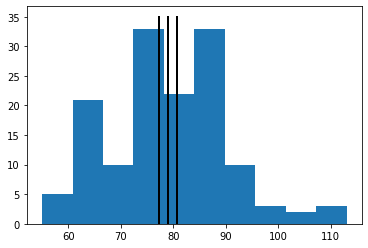

In [38]:
import numpy as np

plt.hist(df.Weight)

# draw bottom
plt.plot([77.17023781694715, 77.17023781694715], [0, 35], 'k-', lw=2)

# draw mean
plt.plot([mu, mu], [0, 35], 'k-', lw=2)

# draw up
plt.plot([up, up], [0, 35], 'k-', lw=2)

plt.show()


**What can you say about these results?**

In [41]:
#your-answer-here
'''the data is concentrated, not spread. but it doesn't make much sense, it's too tight. I don't get it.
everything else is below 5%?'''

"the data is concentrated, not spread. but it doesn't make much sense, it's too tight. I don't get it.\neverything else is below 5%?"

**If your sister weighs 67kg what would you tell your grandmother in regards to her assumption?**

In [42]:
#your-answer-here
''' altough I see the possibilties on the graph, I would have to say that with
95% of certainty my sister couldn't play at wnba'''

" altough I see the possibilties on the graph, I would have to say that with\n95% of certainty my sister couldn't play at wnba"

## Bonus: Can you plot the probability distribution of the average weight, indicating where the critical region is?

In [8]:
# your code here

# Question 2: Do female professional basketball players fail the majority of their free throws?

You do not agree with your sister when she says that most female players fail their free throws. You decide to try and estimate the percentage of players that fail more than 40% of their free throws using, you guessed it, the WNBA sample.

**How would you do it? Try and think about the requirements that your sample must satisfy in order to be used to infer the proportion of players that miss more than 40% of their free throws. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [51]:
#percentage of players that fail more than 40%
#FT% is the proportion of success
print(len(df))
len(df[df['FT%'] < 40]) #low rate of success.

round(((142 - 6)/142),2)

#96% of women only failed 40% or less.

142


0.96

In [10]:
# your answer here

**Now that all the requirements have been taken into account, compute the confidence interval of the proportion with a confidence level of 95%:**

In [56]:
# your code here
mu = df['FT%'].mean() #average of success
std = df['FT%'].std()
print('mu',mu,'std',std)

mu 75.82887323943662 std 18.53615053714203


In [55]:
'''confidence interval is mean +- zscore (which is 1.96) * (variance (which is std**2)   /len**0.5)'''
up = mu + 1.96*(  std / (142**0.5) )
up

bottom = mu - 1.96*(  std  / (142**0.5) )
bottom

print(bottom, up)
# set mean and 95% probability

72.78005561030787 78.87769086856537


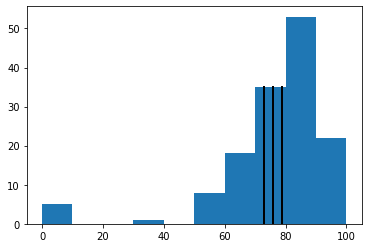

In [57]:
plt.hist(df['FT%'])

# draw bottom
plt.plot([bottom, bottom], [0, 35], 'k-', lw=2)

# draw mean
plt.plot([mu, mu], [0, 35], 'k-', lw=2)

# draw up
plt.plot([up, up], [0, 35], 'k-', lw=2)

plt.show()

**What can you comment about our result? What would you tell your sister?**

In [59]:
#your-answer-here
''' 95% certainty that a female player will score 72% to 78% of her attempts '''


' 95% certainty that a female player will score 72% to 78% of her attempts '

# Bonus: Can you plot the probability distribution of the proportion of missed free throws, indicating where the critical region is?

In [ ]:
#your code here

# Question 3: Is the average number of assists for WNBA players only higher than the average for WNBA and NBA players together?

Your brother-in-law is convinced that the average assists for female professional players is higher than the average of both female and male players combined (which is 52 for the 2016-2017 season). You would like to actually prove if this is true or not but you remember your stats teacher saying "you can't *prove* anything, you just can say that *you are not* saying foolishness".

**How would you do it? Try and think about the requirements that your sample must satisfy in order to do that. Do you feel it actually fulfills those requirements? Do you need to make any assumptions?**

In [62]:
#your-answer-here

#normally distributed?
#sample > 30?
t_stat, pval=ttest_1samp(df['AST'], 52)

pval

#so yes, is not the same (depending on the confidence interval.)

0.033261541354107166

**Use a two-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [64]:
#your code here

pval/2 #we can reject that they are the same

0.016630770677053583

In [66]:
#your-answer-here
t_stat #is negative, so the first input (df['AST']) it's smaller.

-2.1499947192482898

**Now use a one-tailed one-sample t-test to see if we can reject (or not) the null hypothesis with a 95% confidence level.**

In [20]:
#your-answer-here

# Bonus: Can you plot the resulting t-distribution of both tests? Indicate where the is the critical region and where does your statistic fall.**

In [ ]:
#your code here

# Bonus: Satisfying your curiosity

You finally managed to solve your family's debates over basketball! While you were doing that you started to take an interest in the normal distribution.

You read that the normal distribution is present in a lot of natural phenomenons, like blood pressure, IQ, weight and height. If, for example, we could plot the distribution of the weights of every human on the planet right now it would have the shape of a normal distribution.

In light of this you would like to see if it's possible to check if the distribution of the weights of the WNBA players is a sample distribution that comes from a population that has a normal distribution, because theoretically this should be the case.

**How would you try to demonstrate that our sample fits a normal distribution? What kind of test would you use? Would you have to make any assumptions?**

In [22]:
#your-answer-here

In [19]:
# your code here

**What are your comments in regards to the results of the test?**

In [24]:
#your-answer-here